In [2]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

(-1.4497814916291425,
 1.5217208049644744,
 -1.738148484348124,
 1.4569966707404145)

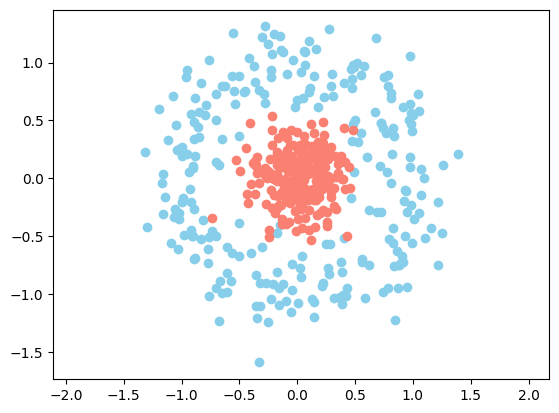

In [10]:
#Crear Data set

n = 500
p = 2

X, Y = make_circles(n_samples=n, factor =0.1, noise=0.2, random_state=True)
Y = Y[:, np.newaxis]
plt.scatter(X[Y[:,0] == 0,0],X[Y[:,0] == 0,1], c = "skyblue")
plt.scatter(X[Y[:,0] == 1,0],X[Y[:,0] == 1,1], c = "salmon")
plt.axis("equal")

In [11]:
#Clase de la capa
class neural_layer():
  def __init__(self, n_conn, n_neur, act_f):
    self.act_f = act_f
    self.b = np.random.rand(1, n_neur)*2 - 1
    self.W = np.random.rand(n_conn, n_neur)*2 - 1

In [12]:
#Funciones de activacion

#introduce no linealidades para juntar varias neuronas
sigm = (lambda x: 1 / (1 + np.e**(-x)),
        lambda x: x * (1-x))
relu = (lambda x: np.maximum(0,x),lambda x: x)

_x = np.linspace(-5,5,100)

In [13]:


def create_nn(topo, act_f):
  nn = [] # Vector para capas
  for l, layer in enumerate(topo[:-1]):
    nn.append(neural_layer(topo[l],topo[l+1], act_f))
  return nn

In [14]:
topo = [p, 4, 8, 1]
neural_net = create_nn(topo, sigm)
cost = (lambda yp, yr: np.mean((yp-yr)**2),
        lambda yp, yr: (yp-yr))
def train (neural_net, X, Y, cost, lr = 0.5,train = True):
  out = [(None, X)]
  # Forward Pass
  # pasar vector de entrada, capa por capa y realizar suma ponderada en cada
  # neurona y despues evaluar el valor de la suma ponderada en la función de
  # activación
  for l, layer in enumerate(neural_net):

    z = out[-1][1] @ neural_net[l].W + neural_net[l].b #suma ponderada
    a = neural_net[l].act_f[0](z)

    out.append((z,a))

  if train:
    #Backward
    deltas = []

    for l in reversed(range(0,len(neural_net))):
      z = out[l+1][0]
      a = out[l+1][1]
      #print (a.shape)

      if l == len(neural_net) - 1:
        deltas.insert(0, cost[1](a, Y) * neural_net[l].act_f[1](a))
      else:
        deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](a))

      _W = neural_net[l].W

      # Decenso del gradiente
      neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis = 0,
                                                 keepdims = True)*lr
      neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0]*lr
  return out[-1][1]




train(neural_net, X, Y, cost, 0.5)

array([[0.20867007],
       [0.20121427],
       [0.21771324],
       [0.22539983],
       [0.19774516],
       [0.2104526 ],
       [0.21071509],
       [0.20744632],
       [0.181908  ],
       [0.22760555],
       [0.20793144],
       [0.19309364],
       [0.22091106],
       [0.22829061],
       [0.20829421],
       [0.1815967 ],
       [0.20912258],
       [0.20087312],
       [0.21181148],
       [0.20884226],
       [0.20602835],
       [0.20212888],
       [0.20137551],
       [0.19974377],
       [0.22582363],
       [0.2027914 ],
       [0.2034585 ],
       [0.20659078],
       [0.19049993],
       [0.1916982 ],
       [0.18583606],
       [0.20691425],
       [0.18031574],
       [0.20729812],
       [0.21184624],
       [0.21868359],
       [0.20900194],
       [0.19147546],
       [0.2069983 ],
       [0.20691366],
       [0.21053583],
       [0.20657977],
       [0.20794619],
       [0.17835846],
       [0.21307899],
       [0.21134389],
       [0.20594764],
       [0.211

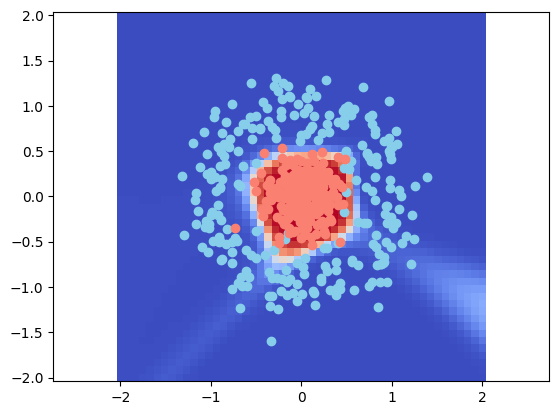

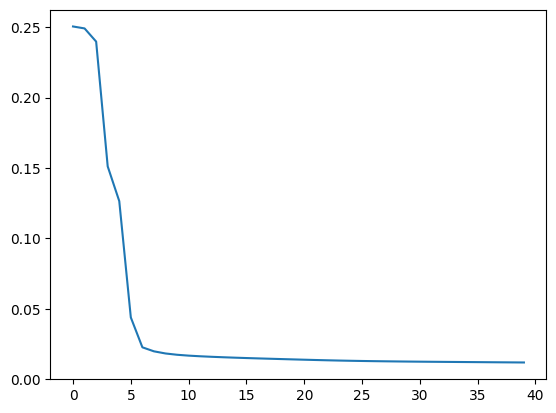

In [15]:
# VISUALIZACIÓN Y TEST

import time
from IPython.display import clear_output

neural_n = create_nn(topo, sigm)

loss = []

for i in range(2000):

  # Entrenemos a la red!
  pY = train(neural_n, X, Y, cost, lr=0.08)

  if i % 50 == 0:

  #  print(pY)

    loss.append(cost[0](pY, Y))

    res = 50

    _x0 = np.linspace(-2, 2, res)
    _x1 = np.linspace(-2, 2, res)

    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, cost, train=False)[0][0]

    plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
    plt.axis("equal")

    plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c="skyblue")
    plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c="salmon")

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5)